# **IMPORT DATA**

In [1]:
import pandas as pd
ecommerce_retail = pd.read_excel('ecommerce retail.xlsx')

# **PART 1. EDA**

## **1.1. Descriptive Statistic**

In [2]:
ecommerce_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Detect the data type of each column.
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Comments:
- There are columns with incorrect data types (object) that need to be converted to the correct format.
- There are missing values in the Description and CustomerID columns.

In [4]:
# detect data value
ecommerce_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Comments:
- There are instances where Quantity and unitPrice are less than 0 -> check the reasons for this.
- Max value > 75th percentile + 1.5*(75th - 25th percentile) ->  indicating the presence of upper outliers.

In [5]:
# Explore dataset
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d9318e5cc8510aa41424ad189e6ed9bfb2f52371521d3f822a065a6c8d9e9d5e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
profile = ProfileReport(ecommerce_retail)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Check data category data types (stockcode)
ecommerce_retail['StockCode'].value_counts()

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
...,...
21431,1
22275,1
17001,1


In [8]:
# Check data category data types (Description)
descriptioncheck = ecommerce_retail['Description'].value_counts()
descriptioncheck

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [9]:
descriptioncheck.to_csv('descriptioncheck.csv')

After checking the descriptioncheck.csv file, we found that the erroneous orders are those that are noted in lowercase (not capitalized like other descriptions) or contain special characters. Mark those rows as True in a new column labeled "Error."

In [10]:
descriptioncheck_update = pd.read_csv('descriptioncheck.csv')

# Add the 'Error' column: True if there are any lowercase letters or if it only contains '?'
descriptioncheck_update['Error'] = descriptioncheck_update['Description'].str.contains(r'[a-z]|\?', regex=True)
descriptioncheck_update

,Description,count,Error
0,WHITE HANGING HEART T-LIGHT HOLDER,2369,False
1,REGENCY CAKESTAND 3 TIER,2200,False
2,JUMBO BAG RED RETROSPOT,2159,False
3,PARTY BUNTING,1727,False
4,LUNCH BAG RED RETROSPOT,1638,False
...,...,...,...
4218,Missing,1,True
4219,historic computer difference?....se,1,True
4220,DUSTY PINK CHRISTMAS TREE 30CM,1,False
4221,WRAP BLUE RUSSIAN FOLKART,1,False


In [11]:
ecommerce_retail_update = ecommerce_retail.merge(descriptioncheck_update[['Description', 'Error']], on='Description', how='left')
print(ecommerce_retail_update[ecommerce_retail_update['Error'] == True].shape)
print(ecommerce_retail_update.shape)

(3092, 9)
(541909, 9)


In [12]:
# Check reason why quantity < 0
ecommerce_retail_update[ecommerce_retail_update['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,False
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,False
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,False
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,False
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,False


In [13]:
# Is Quantity < 0 due to being canceled?
ecommerce_retail_update['InvoiceNo'] = ecommerce_retail_update['InvoiceNo'].astype('string')
ecommerce_retail_update[ecommerce_retail_update['InvoiceNo'].str.startswith('C') & (ecommerce_retail_update['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,False
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,False
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,False
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,False
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,False


In [14]:
ecommerce_retail_update[~ecommerce_retail_update['InvoiceNo'].str.startswith('C') & (ecommerce_retail_update['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,NaN
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,NaN
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,True
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,True
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,True
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,True


Comment: 90% of the rows with quantity < 0 are due to cancellations, but there are still 10% of cases where quantity < 0 and UnitPrice = 0 (primarily due to loss or damage).




In [15]:
# Check the reason why Unit Price <0
ecommerce_retail_update[ecommerce_retail_update['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,True
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,True


Comment: There are 2 cases where Unit Price < 0 described as adjustments for bad debt.

## **1.2. Check data types**

In [16]:
# check data types
ecommerce_retail_update.dtypes

,0
InvoiceNo,string[python]
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Error,object


In [17]:
# Corrects data types
ecommerce_retail_update['InvoiceNo'] = ecommerce_retail_update['InvoiceNo'].astype('string')
ecommerce_retail_update['StockCode'] = ecommerce_retail_update['StockCode'].astype('string')
ecommerce_retail_update['Description'] = ecommerce_retail_update['Description'].astype('string')
ecommerce_retail_update['InvoiceDate'] = pd.to_datetime(ecommerce_retail_update['InvoiceDate'])
ecommerce_retail_update['CustomerID'] = ecommerce_retail_update['CustomerID'].astype('string')
ecommerce_retail_update['Country'] = ecommerce_retail_update['Country'].astype('string')
ecommerce_retail_update.dtypes

,0
InvoiceNo,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,string[python]
Country,string[python]
Error,object


## **1.3. Handling incorrect values**

Action:
- Remove orders with Quantity <0
- Remove orders with UnitPrice <0
- Remove canceled orders

In [18]:
# Only accept orders with Quantity >0
ecommerce_retail_update = ecommerce_retail_update[ecommerce_retail_update['Quantity'] > 0]
# Only accept orders with Unit price >0
ecommerce_retail_update = ecommerce_retail_update[ecommerce_retail_update['UnitPrice'] > 0]
# Only accept orders that are not canceled.
ecommerce_retail_update = ecommerce_retail_update[~ecommerce_retail_update['InvoiceNo'].str.startswith('C')]
ecommerce_retail_update.shape

(530104, 9)

## **1.4. Handling missing values**

In [19]:
# Check missing values
missing = {'volumn': ecommerce_retail_update.isna().sum(),
           'percent': ecommerce_retail_update.isna().sum()/ecommerce_retail_update.shape[0]}
missing_df = pd.DataFrame(missing)
missing_df

,volumn,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,0.249423
Country,0,0.000000
Error,0,0.000000


In [20]:
# Check the missing CustomerID entries to determine the reason.
ecommerce_retail_update[ecommerce_retail_update['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,<NA>,United Kingdom,False
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,<NA>,United Kingdom,False
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,<NA>,United Kingdom,False
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,<NA>,United Kingdom,False


In [21]:
# Create a month column for trend analysis of missing data
ecommerce_retail_update['day'] = ecommerce_retail_update['InvoiceDate'].dt.date
ecommerce_retail_update['month'] = ecommerce_retail_update['day'].apply(lambda x: str(x)[:-3])
ecommerce_retail_update

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,day,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011-12-09,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011-12-09,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12


In [22]:
# Check the trend of missing data by month
ecommerce_retail_update[ecommerce_retail_update['CustomerID'].isna()]['month'].value_counts().sort_index()

,count
month,
2010-12,15323
2011-01,13077
2011-02,7178
2011-03,8628
2011-04,6454
2011-05,7844
2011-06,8792
2011-07,11820
2011-08,7476


Comment: There are missing values nearly every month, indicating a need to review the system for improvements.

In [23]:
# Drop missing values in Customer ID column
ecommerce_retail_update = ecommerce_retail_update.dropna(subset=['CustomerID'])
ecommerce_retail_update.shape

(397884, 11)

## **1.5. Handling duplicates**

In [24]:
#Detect duplicates
duplicates_df= ecommerce_retail_update.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate','CustomerID'])
print(ecommerce_retail_update[duplicates_df].shape)

(10038, 11)


In [25]:
#Inspect specific duplicate rows to detect the reasons.
ecommerce_retail_update[duplicates_df]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,day,month
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,False,2010-12-01,2010-12
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False,2010-12-01,2010-12
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,False,2010-12-01,2010-12
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,False,2010-12-01,2010-12
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,False,2011-12-09,2011-12
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom,False,2011-12-09,2011-12
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom,False,2011-12-09,2011-12
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,False,2011-12-09,2011-12


In [26]:
# Check specific duplicate order IDs.
ecommerce_retail_update[(ecommerce_retail_update['InvoiceNo'] == '536381') & (ecommerce_retail_update['StockCode'] == '71270')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,day,month
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,False,2010-12-01,2010-12
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,False,2010-12-01,2010-12


In [27]:
ecommerce_retail_update[(ecommerce_retail_update['InvoiceNo'] == '536409') & (ecommerce_retail_update['StockCode'] == '90199C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,day,month
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False,2010-12-01,2010-12
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False,2010-12-01,2010-12
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False,2010-12-01,2010-12


Comment: Duplicates may arise from system errors.

In [28]:
#Drop duplicate
ecommerce_retail_update = ecommerce_retail_update.drop_duplicates(subset=['InvoiceNo','StockCode','InvoiceDate','CustomerID'], keep ='first')
ecommerce_retail_update.shape

(387846, 11)

# **PART 2. DATA PROCESSING**

In [29]:
# Create Recency - Frequency - Monetary variables
# Use the last day as a reference point
Lastday = ecommerce_retail_update['day'].max()
# Create a column to calculate cost for each order
ecommerce_retail_update['Cost'] = ecommerce_retail_update['Quantity'] * ecommerce_retail_update['UnitPrice']

# Calculate RFM metrics
rfm = ecommerce_retail_update.groupby('CustomerID').agg(
    Recency = ('day', lambda x: -(Lastday - x.max()).days), # The longer the number of days, the lower the Recency rank -> invert the sign
    Frequency = ('CustomerID', 'count'),
    Monetary = ('Cost', 'sum')).reset_index()
# Adjust data types
rfm['Frequency'] = rfm['Frequency'].astype('int')
rfm.dtypes

<ipython-input-29-111204b74e28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_retail_update['Cost'] = ecommerce_retail_update['Quantity'] * ecommerce_retail_update['UnitPrice']


,0
CustomerID,string[python]
Recency,int64
Frequency,int64
Monetary,float64


In [30]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,-325,1,77183.60
1,12347.0,-2,182,4310.00
2,12348.0,-75,27,1595.64
3,12349.0,-18,73,1757.55
4,12350.0,-310,17,334.40


After completing the calculation of the Recency - Frequency - Monetary variables, we will detect outliers and process them to ensure more accurate data.

<Axes: ylabel='Recency'>

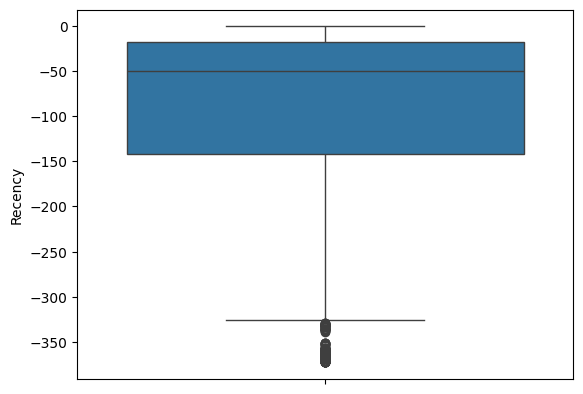

In [31]:
# Observe outliers in the Recency variable.
import seaborn as sns
sns.boxplot(rfm['Recency'])

<Axes: ylabel='Frequency'>

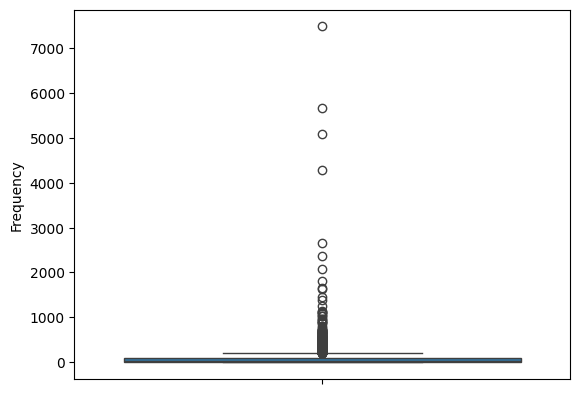

In [32]:
# Observe outliers in the Frequency variable.
sns.boxplot(rfm['Frequency'])

<Axes: ylabel='Monetary'>

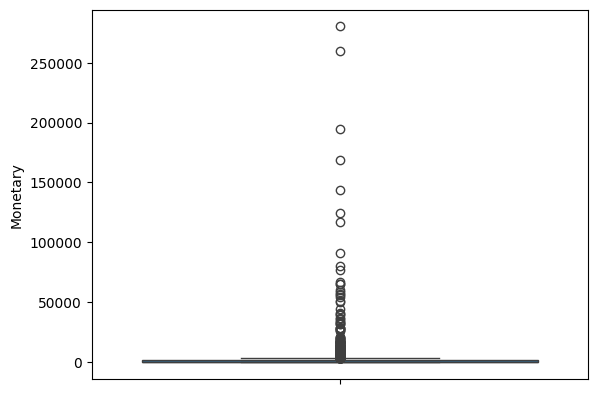

In [33]:
# Observe outliers in the Monetary variable.
sns.boxplot(rfm['Monetary'])

In [34]:
# Drop outliers
rfm_drop_outliers = rfm[(rfm['Recency'] < rfm['Recency'].quantile(0.95)) & \
                    (rfm['Frequency'] < rfm['Frequency'].quantile(0.95)) & \
                    (rfm['Monetary'] < rfm['Monetary'].quantile(0.95))]
rfm_drop_outliers.shape

(3859, 4)

<Axes: ylabel='Recency'>

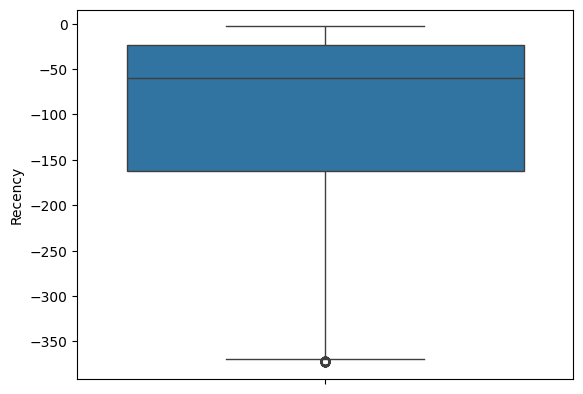

In [35]:
#rmf_drop_outliners
sns.boxplot(rfm_drop_outliers['Recency'])

<Axes: ylabel='Frequency'>

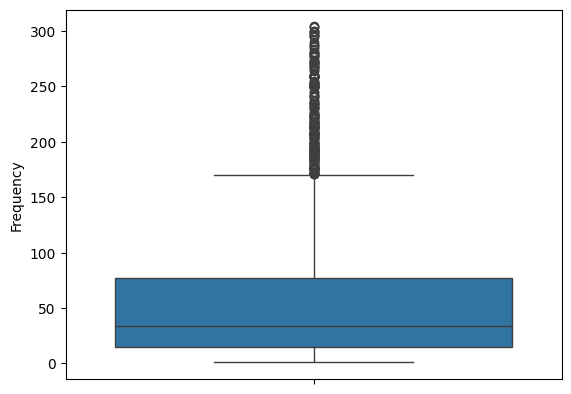

In [36]:
sns.boxplot(rfm_drop_outliers['Frequency'])

<Axes: ylabel='Monetary'>

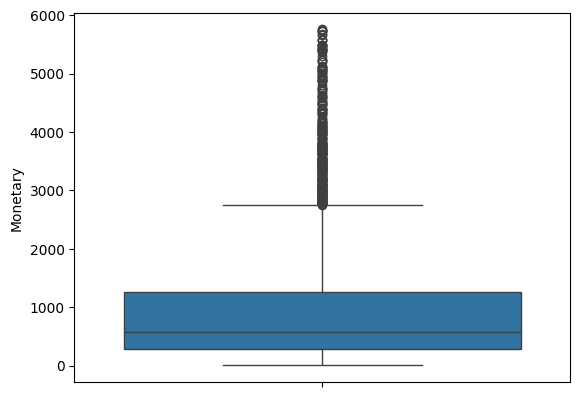

In [37]:
sns.boxplot(rfm_drop_outliers['Monetary'])

In [38]:
# Using qcut to create R, M, F
rfm_drop_outliers['R'] = pd.qcut(rfm_drop_outliers['Recency'], 5, labels=range(1,6)).astype(str)
rfm_drop_outliers['F'] = pd.qcut(rfm_drop_outliers['Frequency'], 5, labels=range(1,6)).astype(str)
rfm_drop_outliers['M'] = pd.qcut(rfm_drop_outliers['Monetary'], 5, labels=range(1,6)).astype(str)
rfm_drop_outliers['RFM'] = rfm_drop_outliers['R'] + rfm_drop_outliers['F'] + rfm_drop_outliers['M']
rfm_drop_outliers.head()

<ipython-input-38-74d2af3c34bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_drop_outliers['R'] = pd.qcut(rfm_drop_outliers['Recency'], 5, labels=range(1,6)).astype(str)
<ipython-input-38-74d2af3c34bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_drop_outliers['F'] = pd.qcut(rfm_drop_outliers['Frequency'], 5, labels=range(1,6)).astype(str)
<ipython-input-38-74d2af3c34bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
2,12348.0,-75,27,1595.64,3,3,5,335
3,12349.0,-18,73,1757.55,5,4,5,545
4,12350.0,-310,17,334.40,1,2,2,122
5,12352.0,-36,83,2042.24,4,4,5,445
6,12353.0,-204,4,89.00,1,1,1,111


In [39]:
# Load data mapping segmentation
segmentation = pd.read_csv('segmentation.csv')
segmentation.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [40]:
segmentation['RFM Score']= segmentation['RFM Score'].astype('string').str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)
segmentation['RFM Score'] = segmentation['RFM Score'].apply(lambda x: x.replace(' ',''))
segmentation.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [41]:
# merge proper segmentation
final_rfm = rfm_drop_outliers.merge(segmentation, left_on='RFM', right_on='RFM Score', how='left')
final_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score
0,12348.0,-75,27,1595.64,3,3,5,335,Loyal,335
1,12349.0,-18,73,1757.55,5,4,5,545,Champions,545
2,12350.0,-310,17,334.40,1,2,2,122,Hibernating customers,122
3,12352.0,-36,83,2042.24,4,4,5,445,Champions,445
4,12353.0,-204,4,89.00,1,1,1,111,Lost customers,111


# **PART 3. VISUALIZATION**

Overall the distribution of the RFM Modelling

Distribution of RFM Modelling by time

Distribution of RFM Modelling by location

## **3.1. Overall the distribution of the RFM Modelling**

In [42]:
# Overall the distribution of the RFM Modelling
# Create data
segment_usercnt = final_rfm[['Segment','CustomerID']].groupby(['Segment']).count().reset_index().rename(columns={'CustomerID':'user_cnt'})
segment_usercnt['volumn_percent'] = ((segment_usercnt['user_cnt']/segment_usercnt['user_cnt'].sum())*100).round(0)
segment_usercnt['Segment'] = segment_usercnt['Segment'] + ' ' + segment_usercnt['volumn_percent'].astype(str) + '%'
segment_usercnt

,Segment,user_cnt,volumn_percent
0,About To Sleep 4.0%,150,4.0
1,At Risk 11.0%,416,11.0
2,Cannot Lose Them 2.0%,94,2.0
3,Champions 16.0%,633,16.0
4,Hibernating customers 18.0%,701,18.0
5,Lost customers 9.0%,357,9.0
6,Loyal 10.0%,370,10.0
7,Need Attention 5.0%,208,5.0
8,New Customers 7.0%,284,7.0
9,Potential Loyalist 13.0%,484,13.0


In [43]:
# create treemap
import matplotlib.pyplot as plt
!pip install squarify
import squarify

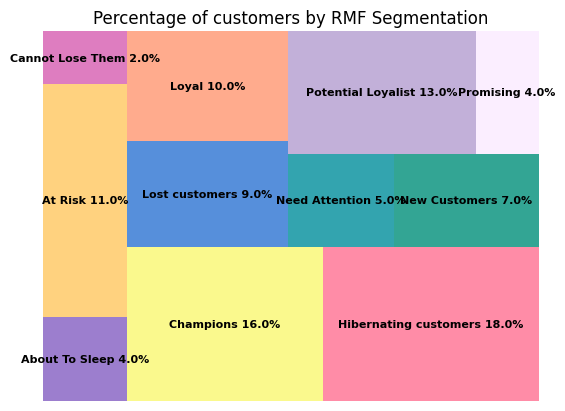

In [44]:
Custom_colors = ['#845ec2', '#ffc75f', '#d65db1', '#f9f871', '#ff6f91', '#2c73d2', '#ff9671', '#008e9b', '#008f7a', '#b39cd0', '#fbeaff']
squarify.plot(sizes=segment_usercnt['user_cnt'], label=segment_usercnt['Segment'],
              color=Custom_colors, alpha=0.8, text_kwargs={'fontsize': 8, 'weight': 'bold'})
plt.axis('off')
plt.title('Percentage of customers by RMF Segmentation')
plt.show()

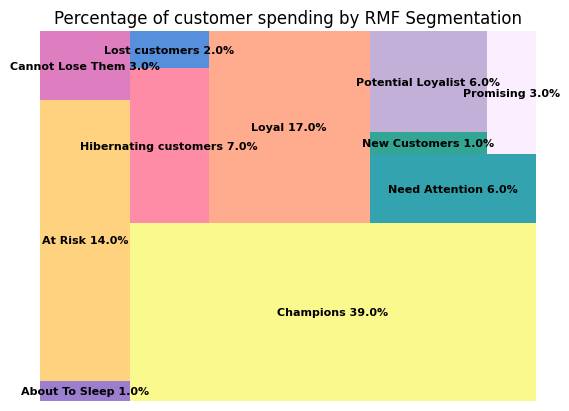

In [45]:
#segment spending
segment_spending = final_rfm[['Segment','Monetary']].groupby(['Segment']).agg({'Monetary':'sum'}).reset_index()
segment_spending['monetary_percent'] = ((segment_spending['Monetary']/segment_spending['Monetary'].sum())*100).round(0)
segment_spending['Segment'] = segment_spending['Segment'] + ' ' + segment_spending['monetary_percent'].astype(str) + '%'
squarify.plot(sizes=segment_spending['Monetary'], label=segment_spending['Segment'],
              color=Custom_colors, alpha=0.8, text_kwargs={'fontsize': 8, 'weight': 'bold'})
plt.axis('off')
plt.title('Percentage of customer spending by RMF Segmentation')
plt.show()

## **3.2. Distribution of RFM Modelling by time**
The time is the date customers entered the products

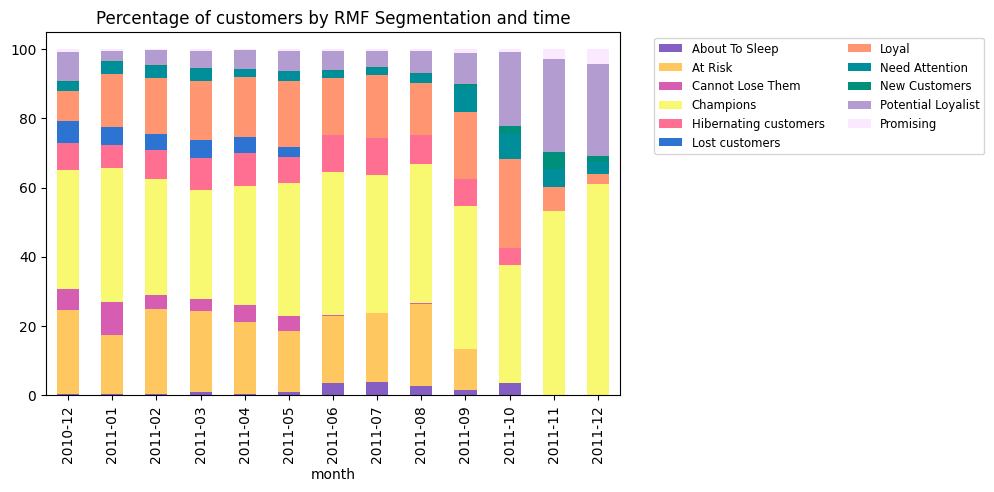

In [46]:
# distribution of segment by time
rmf_customer_month = pd.merge(final_rfm, ecommerce_retail_update[['CustomerID','month']], on='CustomerID', how='left')
rmf_customer_month = rmf_customer_month.groupby(['month','Segment']).agg({'CustomerID':'count'}).reset_index().rename(columns={'CustomerID':'user_cnt'})
rmf_customer_month = rmf_customer_month.pivot_table(values='user_cnt', index='month', columns='Segment', fill_value =0)
rmf_customer_month = rmf_customer_month.div(rmf_customer_month.sum(axis=1), axis=0) * 100

Custom_colors = ['#845ec2', '#ffc75f', '#d65db1', '#f9f871', '#ff6f91', '#2c73d2', '#ff9671', '#008e9b', '#008f7a', '#b39cd0', '#fbeaff']
ax = rmf_customer_month.plot(kind='bar', stacked=True, color=Custom_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.title('Percentage of customers by RMF Segmentation and time')
plt.show()


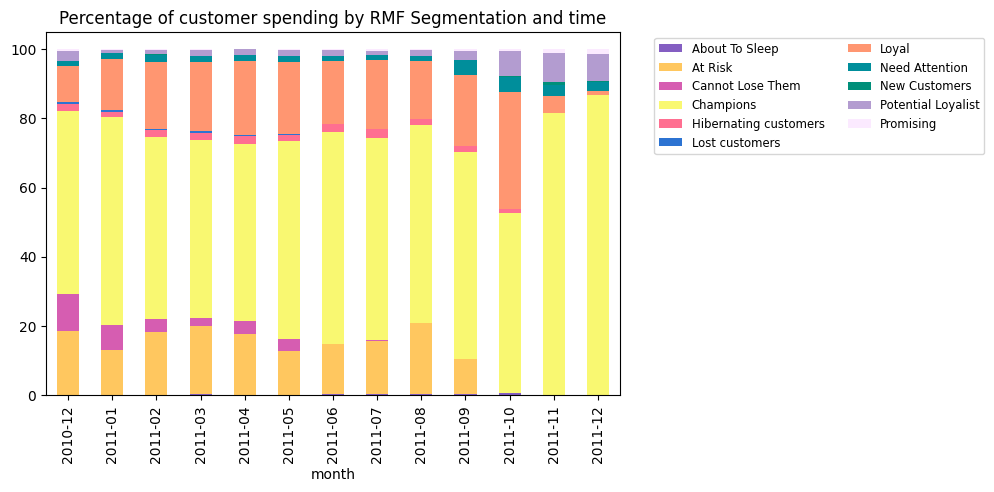

In [47]:
# distribution of segment monetary by time
rmf_monetary_month = pd.merge(final_rfm, ecommerce_retail_update[['CustomerID','month']], on='CustomerID', how='left')
rmf_monetary_month = rmf_monetary_month.groupby(['month','Segment']).agg({'Monetary':'sum'}).reset_index()
rmf_monetary_month = rmf_monetary_month.pivot_table(values='Monetary', index='month', columns='Segment', fill_value =0)
rmf_monetary_month = rmf_monetary_month.div(rmf_monetary_month.sum(axis=1), axis=0) * 100

ax = rmf_monetary_month.plot(kind='bar', stacked=True, color=Custom_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.title('Percentage of customer spending by RMF Segmentation and time')
plt.show()

## **3.3. Distribution of RFM Modelling by location**

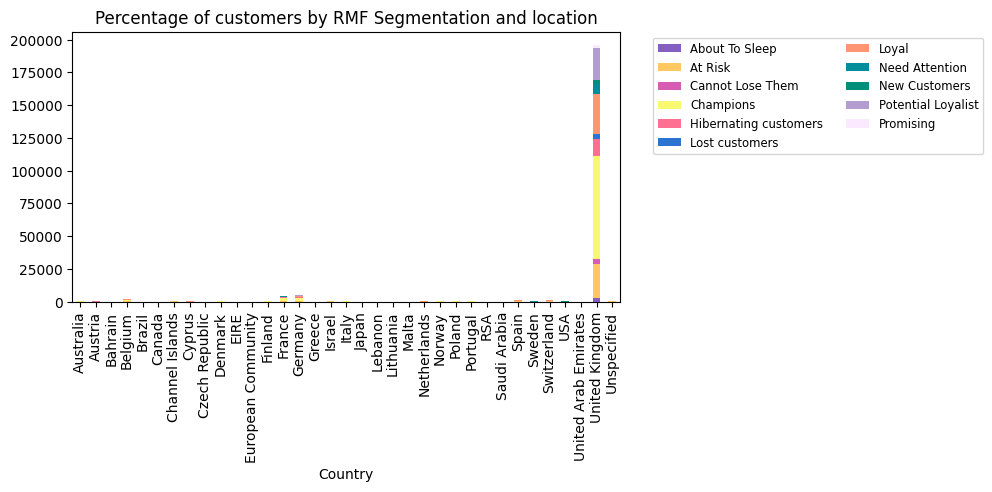

In [48]:
# distribution of segment by location
rmf_customer_country = pd.merge(final_rfm, ecommerce_retail_update[['CustomerID','Country']], on='CustomerID', how='left')
rmf_customer_country = rmf_customer_country.groupby(['Country','Segment']).agg({'CustomerID':'count'}).reset_index().rename(columns={'CustomerID':'user_cnt'})
rmf_customer_country = rmf_customer_country.pivot_table(values='user_cnt', index='Country', columns='Segment', fill_value =0)

Custom_colors = ['#845ec2', '#ffc75f', '#d65db1', '#f9f871', '#ff6f91', '#2c73d2', '#ff9671', '#008e9b', '#008f7a', '#b39cd0', '#fbeaff']
ax = rmf_customer_country.plot(kind='bar', stacked=True, color=Custom_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.title('Percentage of customers by RMF Segmentation and location')
plt.show()

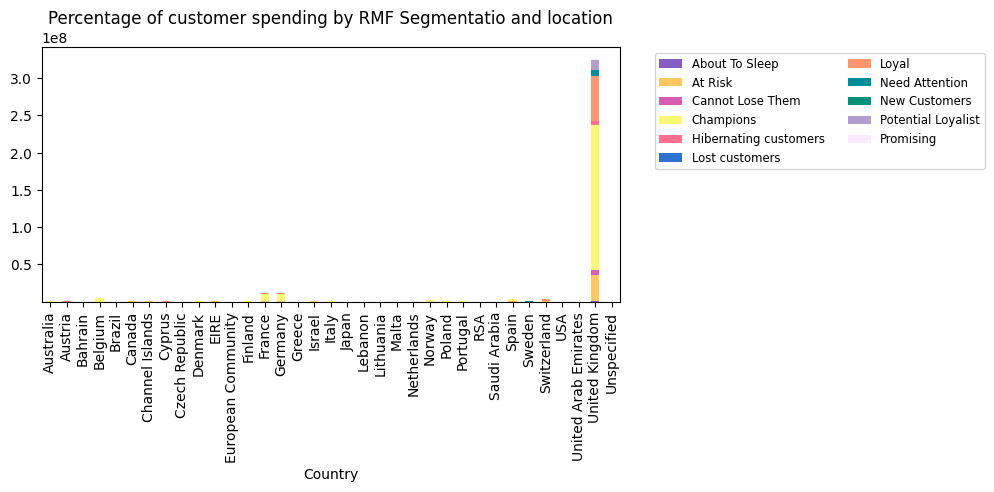

In [49]:
# distribution of segment monetary by location
rmf_monetary_country = pd.merge(final_rfm, ecommerce_retail_update[['CustomerID','Country']], on='CustomerID', how='left')
rmf_monetary_country = rmf_monetary_country.groupby(['Country','Segment']).agg({'Monetary':'sum'}).reset_index()
rmf_monetary_country = rmf_monetary_country.pivot_table(values='Monetary', index='Country', columns='Segment', fill_value =0)

Custom_colors = ['#845ec2', '#ffc75f', '#d65db1', '#f9f871', '#ff6f91', '#2c73d2', '#ff9671', '#008e9b', '#008f7a', '#b39cd0', '#fbeaff']
ax = rmf_monetary_country.plot(kind='bar', stacked=True, color=Custom_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.title('Percentage of customer spending by RMF Segmentatio and location')
plt.show()